In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import multivariate_normal
from matplotlib import cm

# Μέρος Α

# 1. Παρουσιάστε στους γιατρούς τις τιμές των κατανομών p(x|ω1) και p(x|ω2) για διακριτές τιμές x.

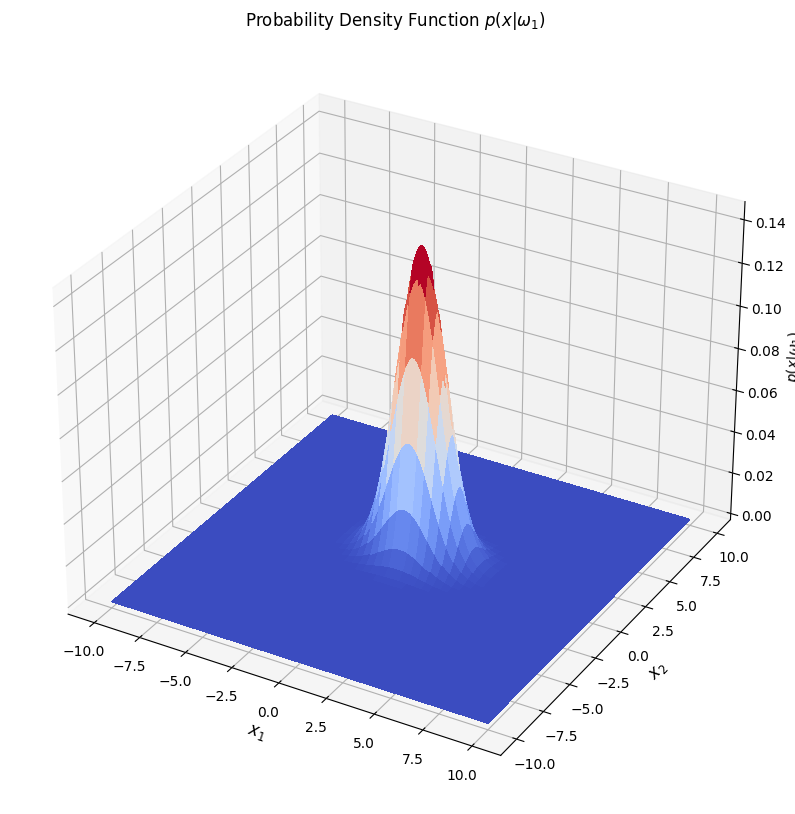

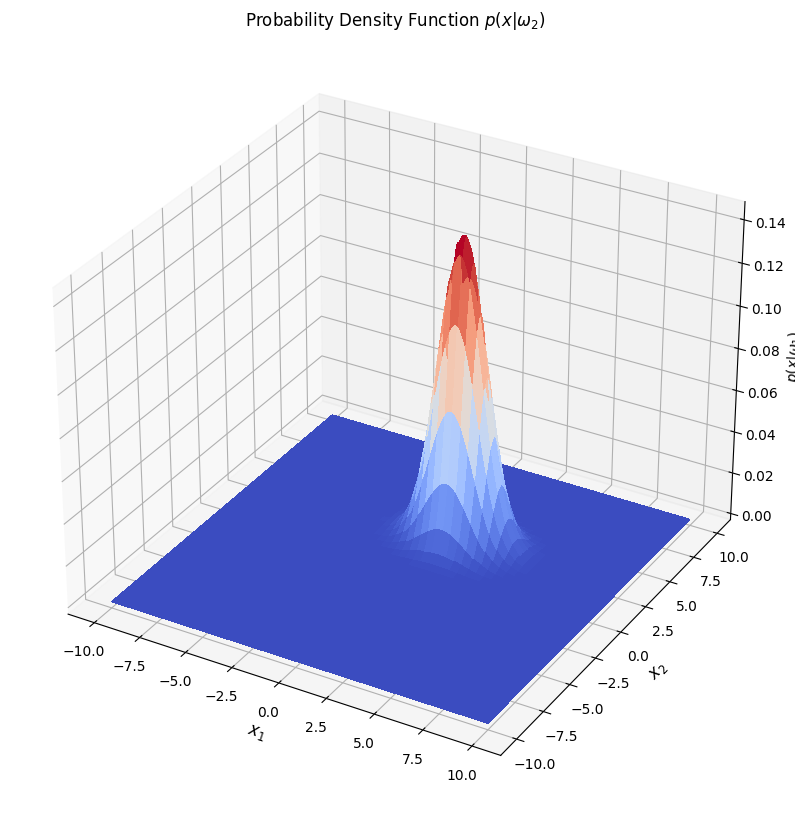

In [57]:
mu = [[0.4, 0.8], [1.5, 2.7]]
cov = [[1.5, 0], [0, 0.8]]
N = 2000
dx1 = 0.01
dx2 = 0.01
p_x_w = np.zeros((N,N,2))
for i in range(len(mu)):
    x1, x2 = np.mgrid[-10:10:dx1, -10:10:dx2]
    y = multivariate_normal(mu[i],cov)
    pos = np.dstack((x1,x2))
    p_x_w[:,:,i] = y.pdf(pos)
    
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111,projection='3d')
    axes.plot_surface(X=x1,Y=x2,Z=p_x_w[:,:,i],cmap=cm.coolwarm,linewidth=0,antialiased=False)
    axes.set_xlabel('$x_1$',fontsize='large')
    axes.set_ylabel('$x_2$',fontsize='large')
    axes.set_zlabel(r'$p(x|ω_1)$')
    if i==0:
        axes.set_title(r'Probability Density Function $p(x|ω_1)$')
    elif i==1:
        axes.set_title(r'Probability Density Function $p(x|ω_2)$')
    plt.show()

# 2. Υπολογίστε την ολική κατανομή πιθανότητας και παρουσιάστε τη.

P(x) = Σ[P(x|ωi)P(ωi)]

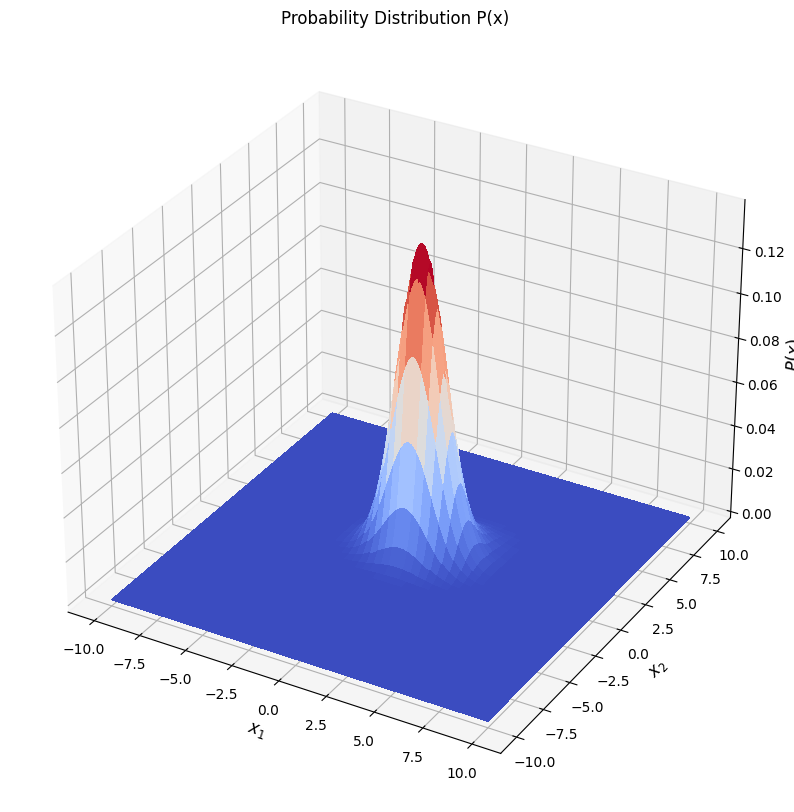

In [58]:
p_x = np.zeros((N,N,2))
p_w1 = 0.95
p_w2 = 0.05

p_x[:,:,0] = p_x_w[:,:,0]*p_w1
p_x[:,:,1] = p_x_w[:,:,1]*p_w2

p_x = np.sum(p_x, axis=2)
    
fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(111,projection='3d')
axes.plot_surface(X=x1,Y=x2,Z=p_x,cmap=cm.coolwarm,linewidth=0,antialiased=False)
axes.set_xlabel('$x_1$',fontsize='large')
axes.set_ylabel('$x_2$',fontsize='large')
axes.set_zlabel(r'$P(x)$',fontsize='large')
axes.set_title('Probability Distribution P(x)',fontsize='large')
plt.show()

# 3. Υπολογίστε τις a posteriori πιθανότητες P(ω1|x) και P(ω2|x) και συμπεριλάβετέ τις στην παρουσίασή σας.

P(ω|x) = P(x|ω)P(ω) / P(x)

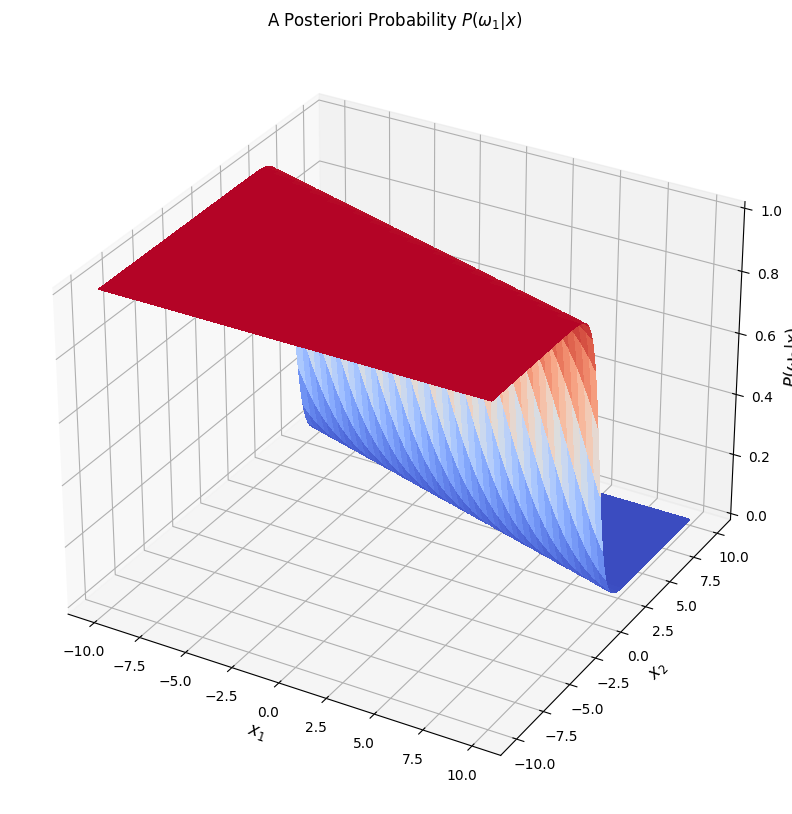

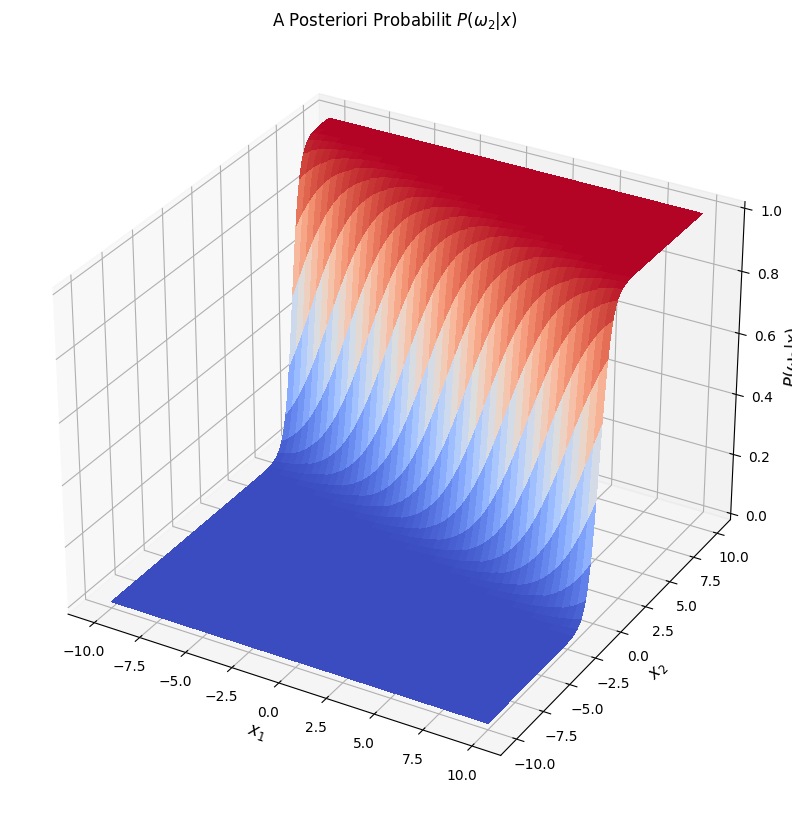

In [59]:
p_w1 = 0.95
p_w2 = 0.05
p_w_x= np.zeros((N,N,2))

p_w_x[:,:,0] = p_x_w[:,:,0]*p_w1/p_x
p_w_x[:,:,1] = p_x_w[:,:,1]*p_w2/p_x

for i in range(2): 
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111,projection='3d')
    axes.plot_surface(X=x1,Y=x2,Z=p_w_x[:,:,i],cmap=cm.coolwarm,linewidth=0,antialiased=False)
    axes.set_xlabel('$x_1$',fontsize='large')
    axes.set_ylabel('$x_2$',fontsize='large')
    axes.set_zlabel(r'$P(ω_1|x)$',fontsize='large')
    if i==0:
        axes.set_zlabel(r'$P(ω_1|x)$',fontsize='large')
        axes.set_title(r'A Posteriori Probability $P(ω_1|x)$',fontsize='large')
    elif i==1:
        axes.set_zlabel(r'$P(ω_1|x)$',fontsize='large')
        axes.set_title(r'A Posteriori Probabilit $P(ω_2|x)$',fontsize='large')
    plt.show()

# 4. Υπολογίστε το σφάλμα κατά Bayes. Κάνετε ένα σχόλιο για το σφάλμα που παρατηρείτε.


Bayes Error = 0.0346


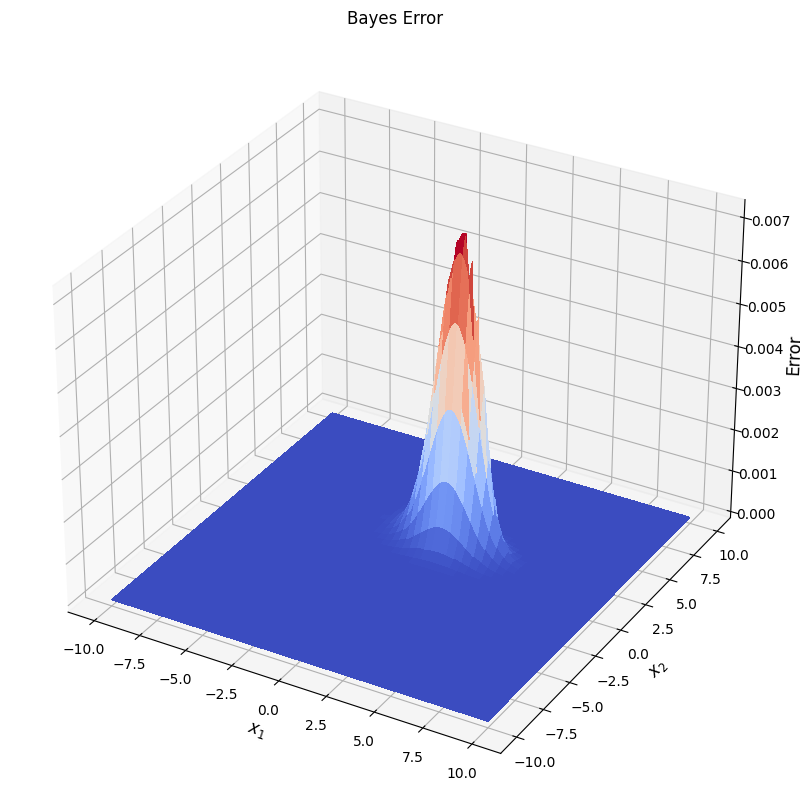

In [60]:
probability_error = np.amin(p_w_x,axis=2)*p_x

error = np.sum(np.amin(p_w_x,axis=2)*p_x*dx1*dx2)

print('Bayes Error = %.4f' % error)

fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(111,projection='3d')
axes.plot_surface(X=x1,Y=x2,Z=probability_error,cmap=cm.coolwarm,linewidth=0,antialiased=False)
axes.set_xlabel('$x_1$',fontsize='large')
axes.set_ylabel('$x_2$',fontsize='large')
axes.set_zlabel('Error',fontsize='large')
axes.set_title('Bayes Error',fontsize='large')
plt.show()

# Μέρος Β

1. Επαναλάβετε τα βήματα 1-4 από το μέρος Α

- P(x|ω1), P(x|ω2)

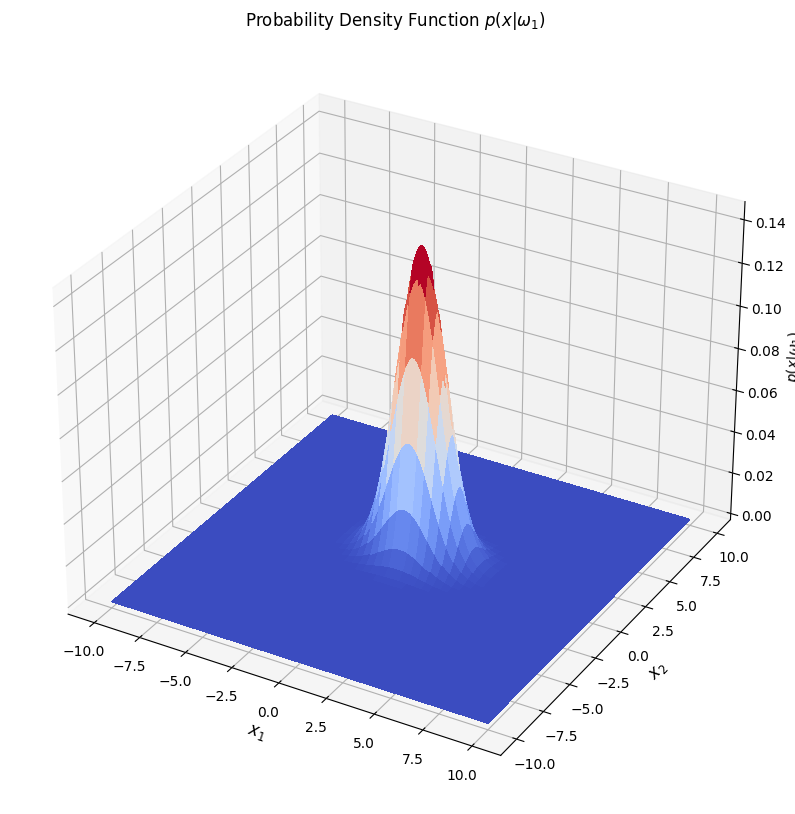

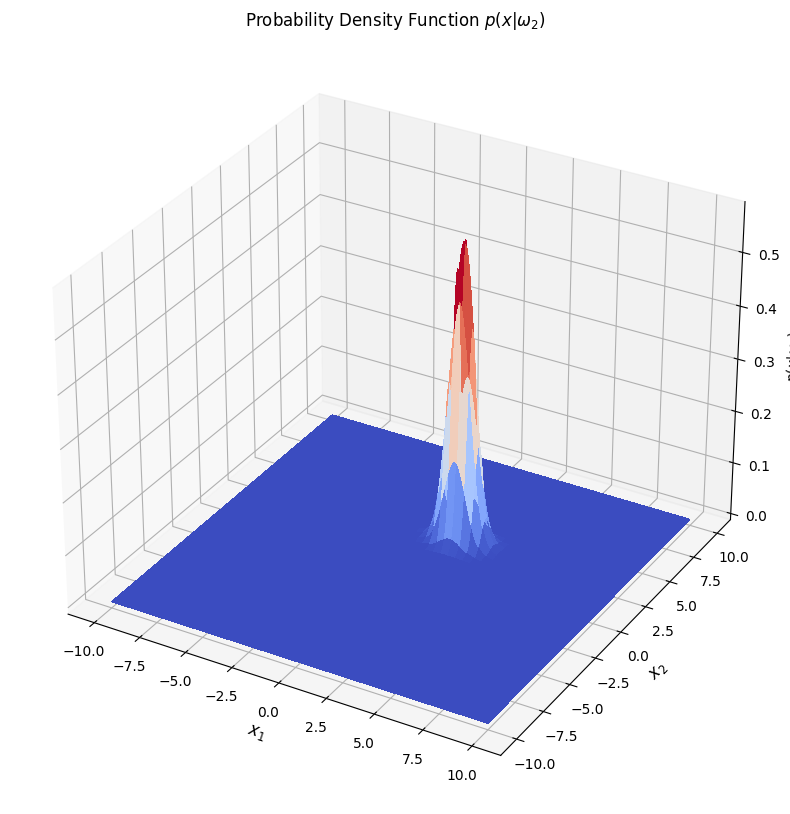

In [61]:
mu = [[0.4, 0.8], [1.5, 2.7]]
cov = np.array([[1.5, 0], [0, 0.8]])
cov = [cov, cov/4]

N = 2000
dx1 = 0.01
dx2 = 0.01
p_x_w = np.zeros((N,N,2))
for i in range(len(mu)):
    x1, x2 = np.mgrid[-10:10:dx1, -10:10:dx2]
    y = multivariate_normal(mu[i],cov[i])
    pos = np.dstack((x1,x2))
    p_x_w[:,:,i] = y.pdf(pos)
    
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111,projection='3d')
    axes.plot_surface(X=x1,Y=x2,Z=p_x_w[:,:,i],cmap=cm.coolwarm,linewidth=0,antialiased=False)
    axes.set_xlabel('$x_1$',fontsize='large')
    axes.set_ylabel('$x_2$',fontsize='large')
    axes.set_zlabel(r'$p(x|ω_1)$')
    if i==0:
        axes.set_title(r'Probability Density Function $p(x|ω_1)$')
    elif i==1:
        axes.set_title(r'Probability Density Function $p(x|ω_2)$')
    plt.show()

- P(x)

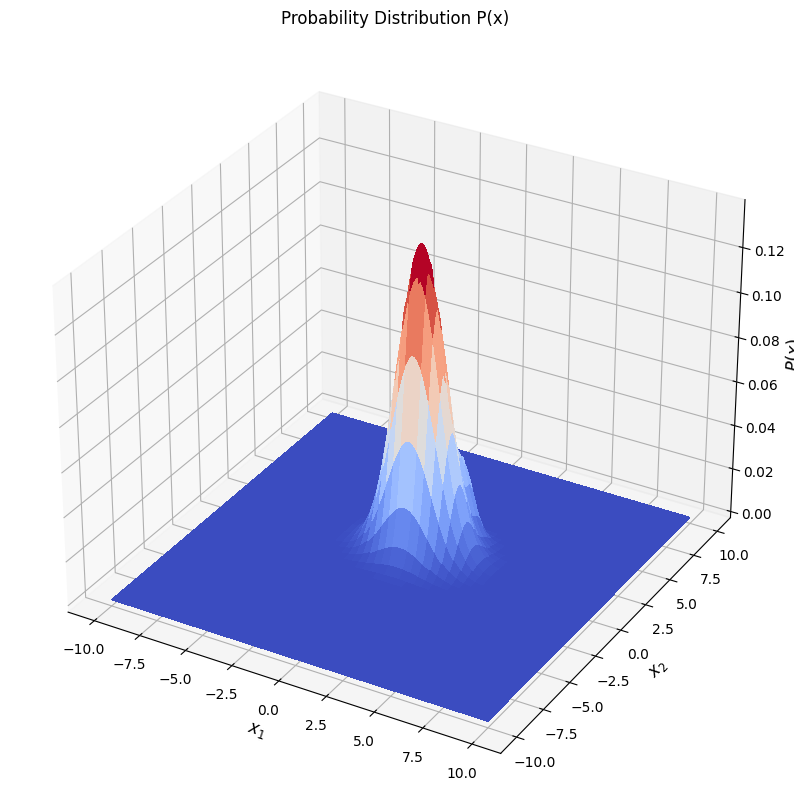

In [62]:
p_x = np.zeros((N,N,2))
p_w1 = 0.95
p_w2 = 0.05

p_x[:,:,0] = p_x_w[:,:,0]*p_w1
p_x[:,:,1] = p_x_w[:,:,1]*p_w2

p_x = np.sum(p_x, axis=2)
    
fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(111,projection='3d')
axes.plot_surface(X=x1,Y=x2,Z=p_x,cmap=cm.coolwarm,linewidth=0,antialiased=False)
axes.set_xlabel('$x_1$',fontsize='large')
axes.set_ylabel('$x_2$',fontsize='large')
axes.set_zlabel(r'$P(x)$',fontsize='large')
axes.set_title('Probability Distribution P(x)',fontsize='large')
plt.show()

- P(ω1|x), P(ω2|x)

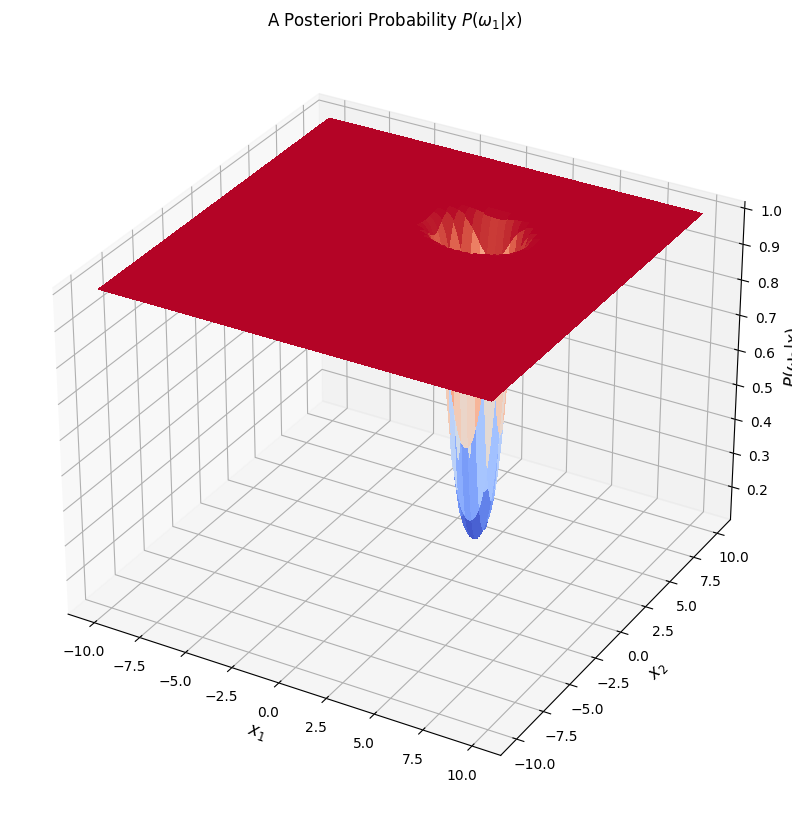

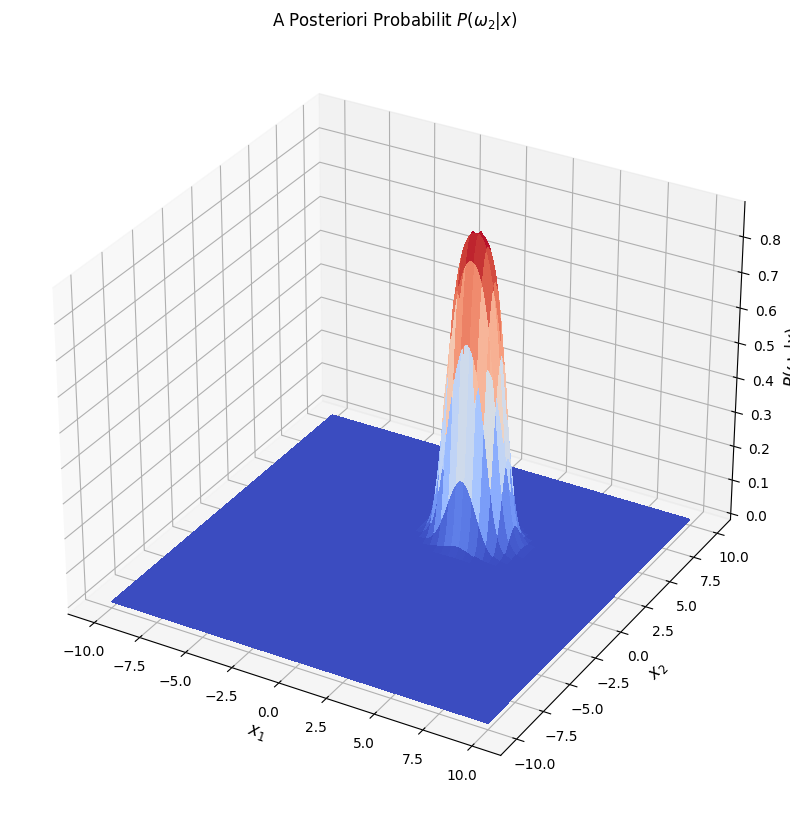

In [63]:
p_w1 = 0.95
p_w2 = 0.05
p_w_x= np.zeros((N,N,2))

p_w_x[:,:,0] = p_x_w[:,:,0]*p_w1/p_x
p_w_x[:,:,1] = p_x_w[:,:,1]*p_w2/p_x

for i in range(2): 
    fig = plt.figure(figsize=(10,10))
    axes = fig.add_subplot(111,projection='3d')
    axes.plot_surface(X=x1,Y=x2,Z=p_w_x[:,:,i],cmap=cm.coolwarm,linewidth=0,antialiased=False)
    axes.set_xlabel('$x_1$',fontsize='large')
    axes.set_ylabel('$x_2$',fontsize='large')
    axes.set_zlabel(r'$P(ω_1|x)$',fontsize='large')
    if i==0:
        axes.set_zlabel(r'$P(ω_1|x)$',fontsize='large')
        axes.set_title(r'A Posteriori Probability $P(ω_1|x)$',fontsize='large')
    elif i==1:
        axes.set_zlabel(r'$P(ω_1|x)$',fontsize='large')
        axes.set_title(r'A Posteriori Probabilit $P(ω_2|x)$',fontsize='large')
    plt.show()

- Bayes Error

Bayes Error = 0.0290


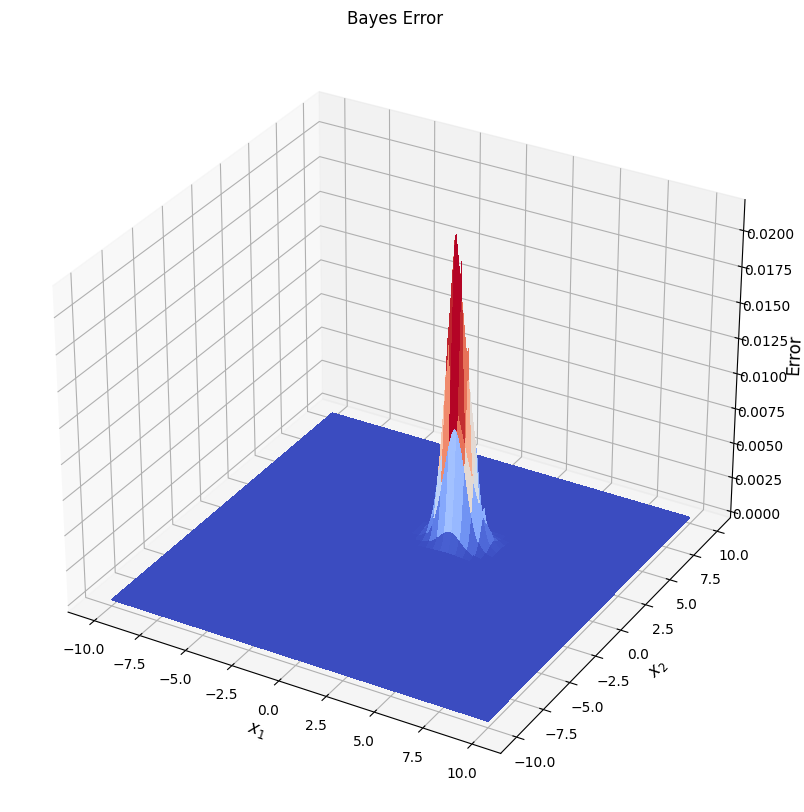

In [64]:
probability_error = np.amin(p_w_x,axis=2)*p_x

error = np.sum(np.amin(p_w_x,axis=2)*p_x*dx1*dx2)

print('Bayes Error = %.4f' % error)

fig = plt.figure(figsize=(10,10))
axes = fig.add_subplot(111,projection='3d')
axes.plot_surface(X=x1,Y=x2,Z=probability_error,cmap=cm.coolwarm,linewidth=0,antialiased=False)
axes.set_xlabel('$x_1$',fontsize='large')
axes.set_ylabel('$x_2$',fontsize='large')
axes.set_zlabel('Error',fontsize='large')
axes.set_title('Bayes Error',fontsize='large')
plt.show()